<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src="https://i.postimg.cc/hP7Wmpgx/1h.png" style="display: block; margin-left: auto; margin-right: auto;">

<img src="https://github.com/FarzadNekouee/Heart_Disease_Prediction/blob/master/image.jpg?raw=true" width="1800">

<a id="import"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\downloads')

In [4]:
import os
os.getcwd()

'C:\\Users\\dell\\downloads'

<a id="read"></a>
# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [5]:
# loading the dataset
df = pd.read_csv('heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __age__ | Age of the patient in years |
| __sex__ | Gender of the patient (0 = male, 1 = female) |
| __cp__ | Chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic |
| __trestbps__ | Resting blood pressure in mm Hg |
| __chol__ | Serum cholesterol in mg/dl |                     
| __fbs__ | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| __restecg__ | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy |  
| __thalach__ | Maximum heart rate achieved during a stress test |                      
| __exang__ | Exercise-induced angina (1 = yes, 0 = no) |
| __oldpeak__ | ST depression induced by exercise relative to rest |
| __slope__ | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping |                      
| __ca__ | Number of major vessels (0-4) colored by fluoroscopy |              
| __thal__ | Thalium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not described  |
| __target__ | Heart disease status (0 = no disease, 1 = presence of disease) |

In [8]:
df.shape

(1025, 14)

In [9]:
#concise summary of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
#Generating descriptive statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


<a id="eda"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

`Let's find how many people have heart disease and how many people doesn't have heart disease?`

In [11]:
#finging the values
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

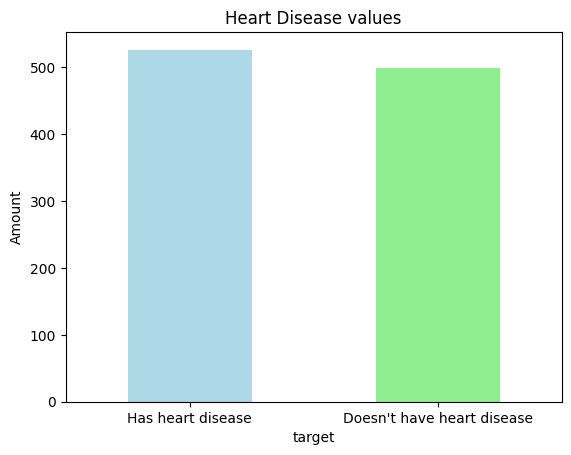

In [12]:
#plotting bar chart.
fig = df.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Amount");

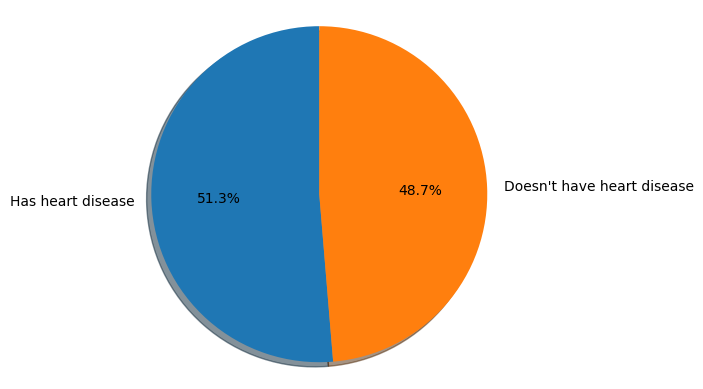

In [13]:
#visualizing in Pie chart
labels = "Has heart disease", "Doesn't have heart disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.target.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Now let's check how many `Male` and `Female` are in the dataset

In [14]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

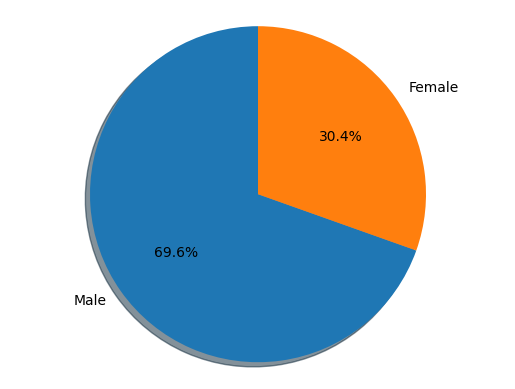

In [15]:
#visualizing in Pie chart
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

`Let's find People of which sex has most heart disease?`

In [16]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


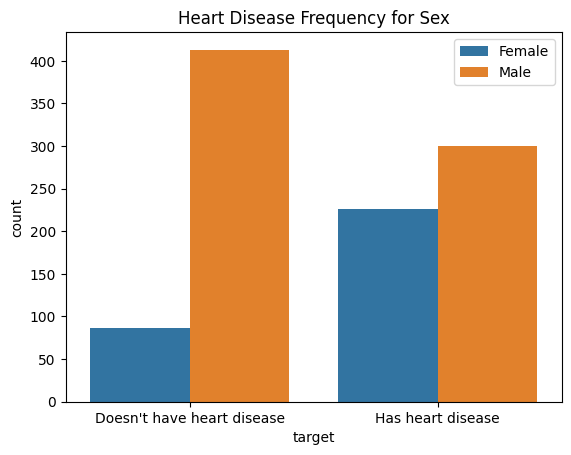

In [17]:
fig = sns.countplot(x = 'target', data = df, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

`Let's find people of which sex has which type of chest pain most?`

In [18]:
#counting values for different chest pain
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

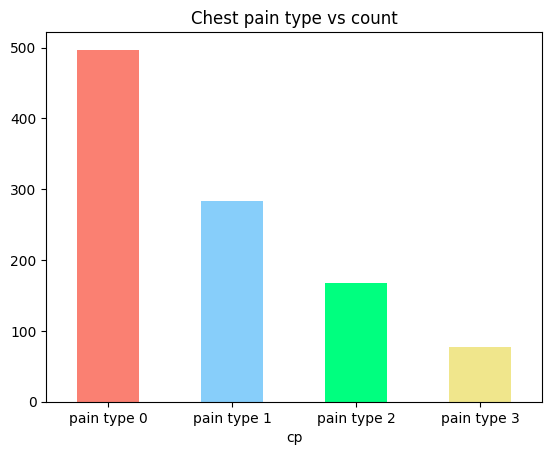

In [19]:
#plotting a bar chart
fig = df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

In [20]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


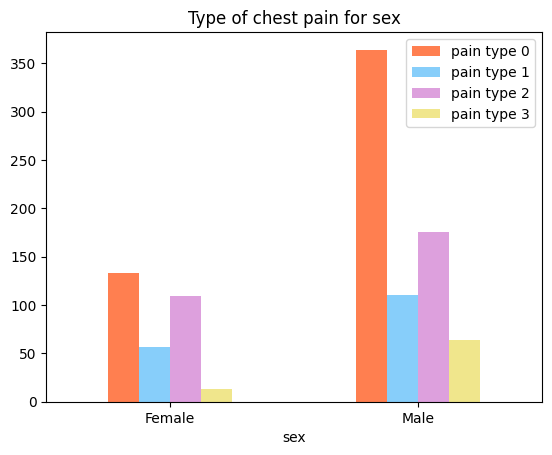

In [21]:
fig = pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

`Now let's find people with which chest pain are most pron to have heart disease?`

In [22]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


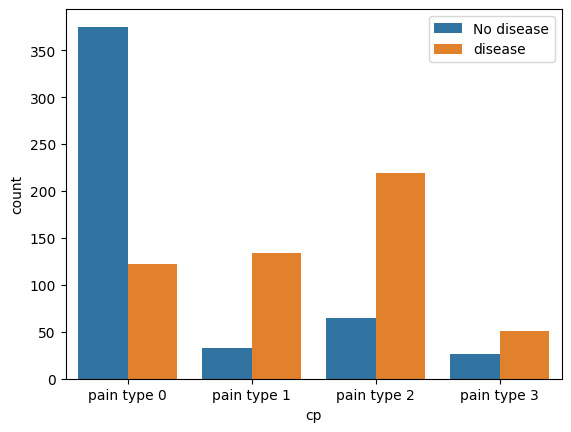

In [23]:
fig = sns.countplot(x = 'cp', data = df, hue = 'target')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease']);

Now let's take look at our age column.

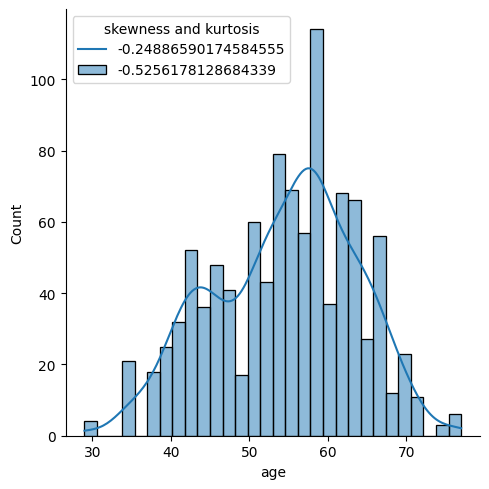

In [24]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = df, bins = 30, kde = True)
skewness=str(df["age"].skew())
kurtosis=str(df["age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

Let's plot another distribution plot for `Maximum heart rate`

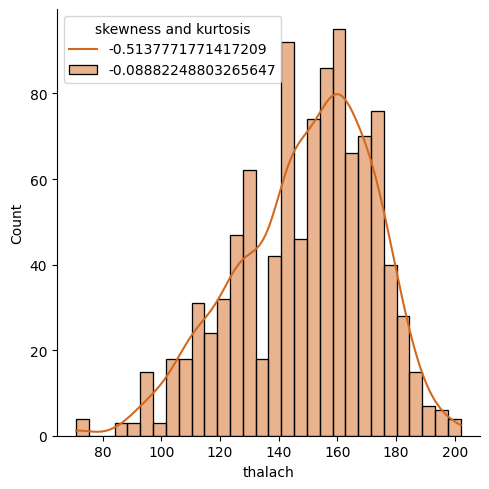

In [25]:
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'chocolate')
skewness=str(df["thalach"].skew())
kurtosis=str(df["thalach"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

`Now let's observe Age vs Maximum heart rate when people have heart disease.`

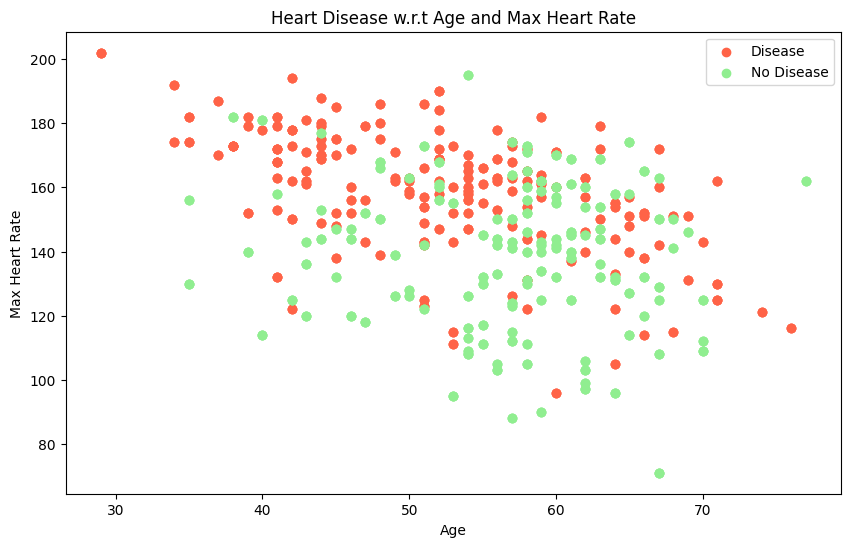

In [26]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="tomato")

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightgreen")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Let's make a density curve for visualizing the distribution of `age` and `thalach`(Maximum Heart Rate) observations in our dataset. 

Let's see a distribution plot for `number of people with heart disease` vs `max heart rate`

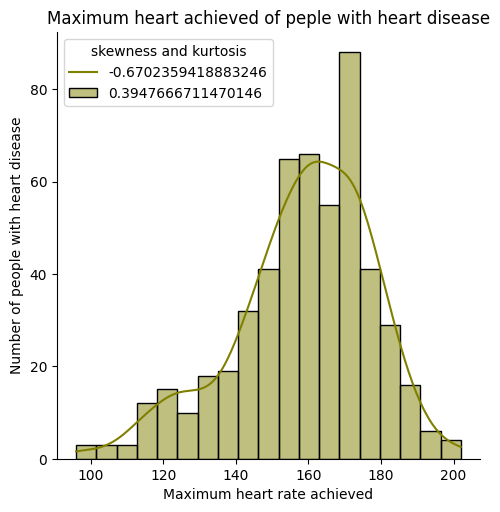

In [27]:
sns.displot(x = df.thalach[df.target==1], data = df, kde = True, color= 'olive')
skewness=str(df.thalach[df.target==1].skew())
kurtosis=str(df.thalach[df.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of peple with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

Distribution plot for `number of people without heart disease` vs `max heart rate`

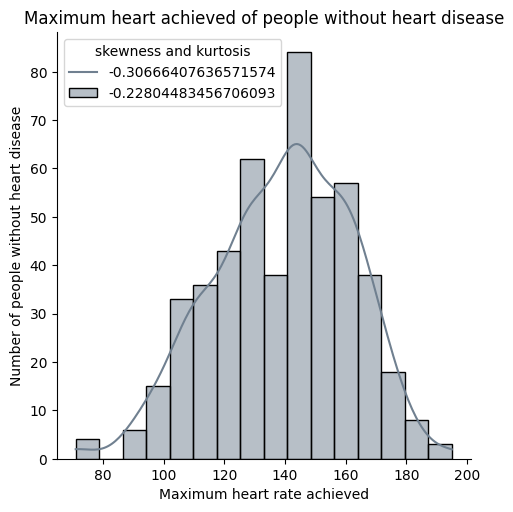

In [28]:
sns.displot(x = df.thalach[df.target==0], data = df, kde = True, color= 'slategray')
skewness=str(df.thalach[df.target==0].skew())
kurtosis=str(df.thalach[df.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

`Now let's observe Age vs Serum Cholestoral when people have heart disease.`

Now, let's make a distribution plot for serum cholestoral

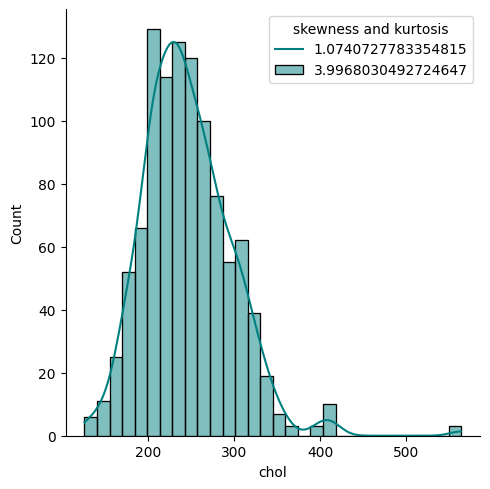

In [29]:
sns.displot(x = 'chol', data = df, bins = 30, kde = True, color = 'teal')
skewness=str(df['chol'].skew())
kurtosis=str(df['chol'].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));

Now let's plot another scatter plot for Age vs serum cholestoral

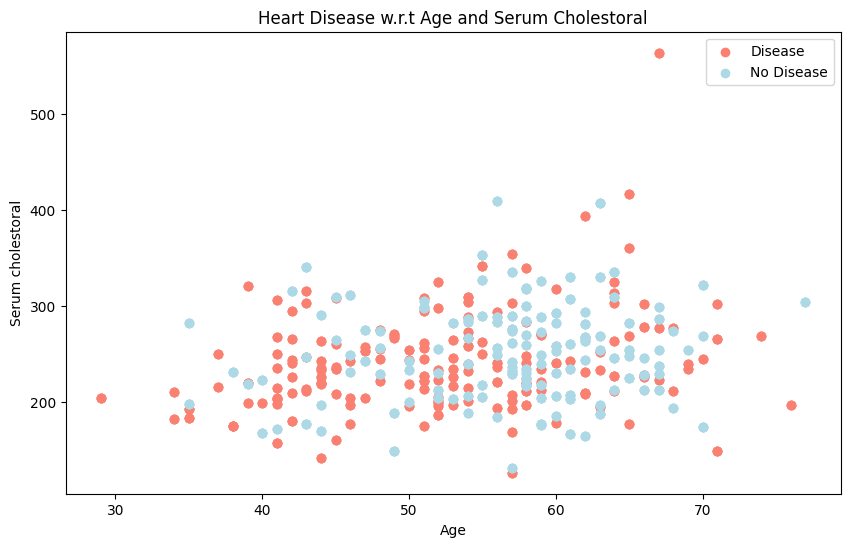

In [30]:
# Creating another figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

Let's make a density curve for visualizing the distribution of `age` and `chol` observations in our dataset. 

Distribution plot for `number of people with heart disease` vs `Serum Cholestoral`

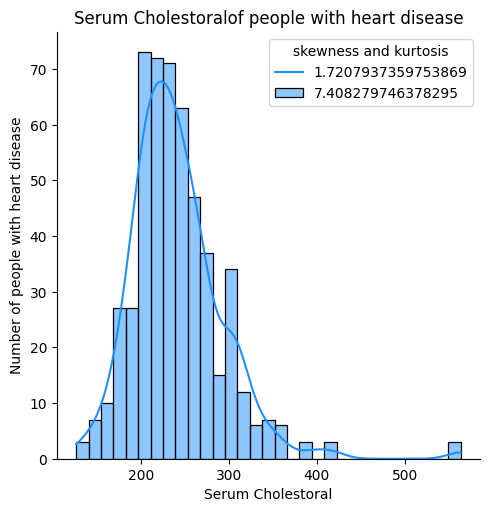

In [31]:
sns.displot(x = df.chol[df.target==1], data = df, kde = True, color= 'dodgerblue')
skewness=str(df.chol[df.target==1].skew())
kurtosis=str(df.chol[df.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholestoralof people with heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people with heart disease");

Distribution plot for `number of people without heart disease` vs `Serum Cholestoral`

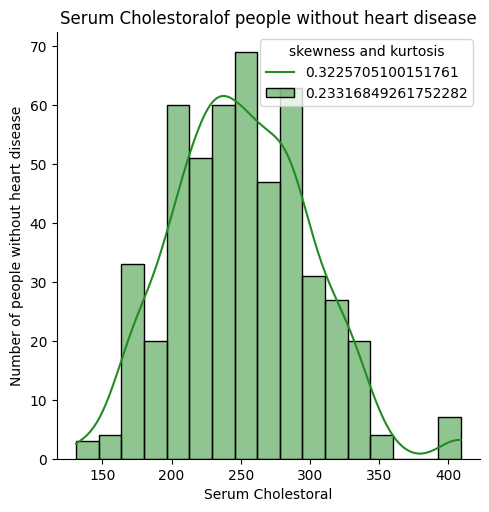

In [32]:
sns.displot(x = df.chol[df.target==0], data = df, kde = True, color= 'forestgreen')
skewness=str(df.chol[df.target==0].skew())
kurtosis=str(df.chol[df.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"));
plt.title("Serum Cholestoralof people without heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people without heart disease");

`Now let's find People of which sex has more exercise induced angina?`

In [33]:
pd.crosstab(df.exang, df.sex)

sex,0,1
exang,,
0,238,442
1,74,271


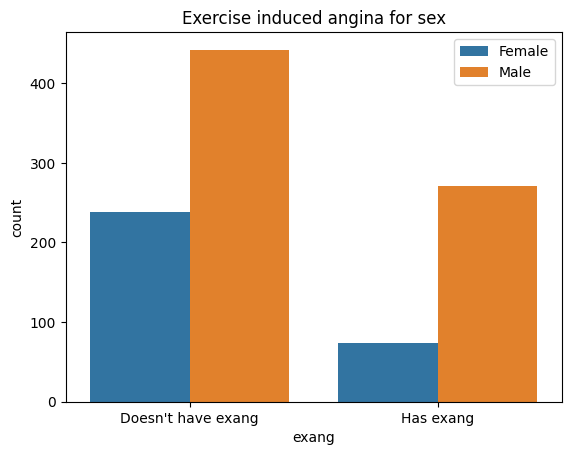

In [34]:
fig = sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title('Exercise induced angina for sex')
fig.set_xticklabels(labels=["Doesn't have exang", 'Has exang'], rotation=0)
plt.legend(['Female', 'Male']);

`Which sex of people has more fasting blood sugar > 120 mg/dl?`

In [35]:
df.fbs.value_counts()

fbs
0    872
1    153
Name: count, dtype: int64

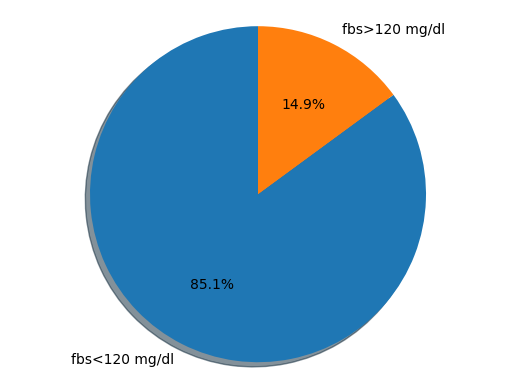

In [36]:
#visualizing in Pie chart
labels = 'fbs<120 mg/dl', 'fbs>120 mg/dl'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.fbs.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [37]:
pd.crosstab(df.sex, df.fbs)

fbs,0,1
sex,,
0,270,42
1,602,111


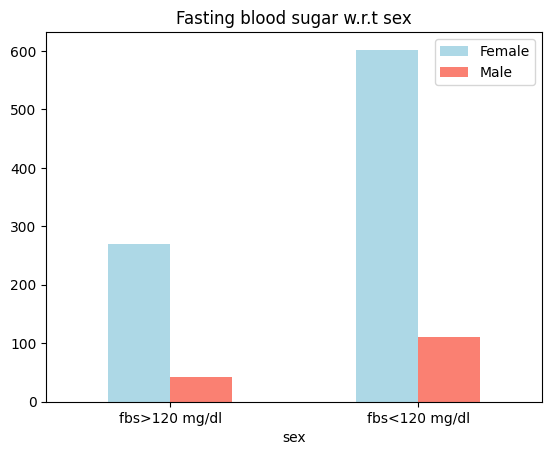

In [38]:
fig = pd.crosstab(df.sex, df.fbs).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t sex")
fig.set_xticklabels(labels=['fbs>120 mg/dl', 'fbs<120 mg/dl'], rotation=0)
plt.legend(['Female', 'Male']);

In [39]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<a id="preprocessing"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

In [40]:
#checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null values.

In [41]:
# creating dependent and independent matrix of features
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 |  Model Building</p>

In [42]:
# Splitting the dataset in features and label
X = df.drop('target', axis=1)
y = df['target']

In [43]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [44]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [45]:
# spltting the dataset into train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 31)

In [46]:
len(x_train), len(x_test), len(y_train), len(y_test)

(820, 205, 820, 205)

In [47]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
999,67,1,0,125,254,1,1,163,0,0.2,1,2,3
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2
605,71,0,2,110,265,1,0,130,0,0.0,2,1,2
172,56,1,1,120,240,0,1,169,0,0.0,0,0,2
385,51,1,2,110,175,0,1,123,0,0.6,2,0,2


In [48]:
y_train.head()

999    0
208    1
605    1
172    1
385    1
Name: target, dtype: int64

<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 |  LogisticRegression Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:#ff826e'>Step 7.1 |</span><span style='color:red'> LogisticRegression</span></b>

In [49]:

log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.8585365853658536

____
<a id="svm_hp"></a>
# <b><span style='color:#ff826e'>Step 7.2 |</span><span style='color:red'> Hyper Tuning Logistic Regression</span></b>

In [50]:

log_grid = {'C': np.logspace(-5, 5),
            'solver': ['liblinear'],
            'max_iter': np.arange(1000, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(random_state = 7),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(x_train, y_train)
log_tuned_score = log_gscv.score(x_test, y_test)
log_tuned_score

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


0.8682926829268293

In [51]:
log_gscv.best_params_

{'C': 0.04714866363457394,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

____
<a id="svm_eval"></a>
# <b><span style='color:#ff826e'>Step 7.3 |</span><span style='color:red'> Log Model Evaluation</span></b>

In [52]:
log_predictions = log_gscv.predict(x_test)

In [53]:
print(classification_report(y_test, log_predictions))


              precision    recall  f1-score   support

           0       0.91      0.80      0.85        97
           1       0.84      0.93      0.88       108

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 |  KNeighborsClassifier Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:#ff826e'>Step 8.1 |</span><span style='color:red'> KNeighborsClassifier</span></b>

In [54]:

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
knn_score = knn_clf.score(x_test, y_test)
knn_score

0.7560975609756098

____
<a id="svm_hp"></a>
# <b><span style='color:#ff826e'>Step 8.2 |</span><span style='color:red'> Hyper Tuning Knn</span></b>

In [55]:
knn_grid = {'n_neighbors': np.arange(2, 15),
            'leaf_size': [10, 15, 20],
            'p':[1,2], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree']}

knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid=knn_grid,
                        cv=5,
                        verbose=True)

knn_gscv.fit(x_train, y_train)
knn_tuned_score = knn_gscv.score(x_test, y_test)
knn_tuned_score

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


0.9414634146341463

In [56]:
knn_gscv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'p': 1}

____
<a id="svm_eval"></a>
# <b><span style='color:#ff826e'>Step 8.3 |</span><span style='color:red'> KNN Model Evaluation</span></b>

In [57]:
knn_predictions = knn_gscv.predict(x_test)

In [58]:
print(classification_report(y_test, knn_predictions))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        97
           1       1.00      0.89      0.94       108

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.95      0.94      0.94       205



<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 |  Support Vector Classifier Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:#ff826e'>Step 9.1 |</span><span style='color:red'> Support Vector Classifier</span></b>

In [59]:

svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(x_train, y_train)
svc_score = svc_clf.score(x_test, y_test)
svc_score

0.7560975609756098

____
<a id="svm_hp"></a>
# <b><span style='color:#ff826e'>Step 9.2 |</span><span style='color:red'> Hyper Tuning Support Vector Classifier</span></b>

In [60]:
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(x_train, y_train)
svc_tuned_score = log_gscv.score(x_test, y_test)
svc_tuned_score

Fitting 5 folds for each of 60 candidates, totalling 300 fits


0.8682926829268293

In [61]:
svc_gscv.best_params_

{'C': 100000.0, 'degree': 2, 'kernel': 'rbf'}

____
<a id="svm_eval"></a>
# <b><span style='color:#ff826e'>Step 9.3 |</span><span style='color:red'> SVC Model Evaluation</span></b>

In [62]:
svc_predictions = svc_gscv.predict(x_test)

In [63]:
print(classification_report(y_test, svc_predictions))


              precision    recall  f1-score   support

           0       0.87      0.91      0.89        97
           1       0.91      0.88      0.90       108

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 |  Random Forest Classifier Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:#ff826e'>Step 10.1 |</span><span style='color:red'> Random Forest Classifier</span></b>

In [64]:

rand_clf = RandomForestClassifier(n_estimators=1000, random_state = 35)
rand_clf.fit(x_train, y_train)
ranf_score = rand_clf.score(x_test, y_test)
ranf_score

1.0

**oh boy!!**

100% acuuracy!! It is surely overfitting. 

____
<a id="svm_hp"></a>
# <b><span style='color:#ff826e'>Step 10.2 |</span><span style='color:red'> Hyper Tuning Random Forest Classifier</span></b>

In [65]:
rand_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    
}

ranf_gscv = GridSearchCV(rand_clf, param_grid=rand_grid, cv=5, verbose=1, n_jobs=-1)

ranf_gscv.fit(x_train, y_train)
ranf_tuned_score = ranf_gscv.score(x_test, y_test)
ranf_tuned_score

Fitting 5 folds for each of 24 candidates, totalling 120 fits


1.0

In [66]:
ranf_gscv.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

____
<a id="svm_eval"></a>
# <b><span style='color:#ff826e'>Step 10.3 |</span><span style='color:red'> RandomForestClassifier Model Evaluation</span></b>

In [67]:
ran_predictions = ranf_gscv.predict(x_test)

In [68]:
print(classification_report(y_test, ran_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       108

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 |  GradientBoostingClassifier Model Building</p>

____
<a id="svm_base"></a>
# <b><span style='color:#ff826e'>Step 11.1 |</span><span style='color:red'> GradientBoostingClassifier</span></b>

In [69]:

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_score = gbc.score(x_test, y_test)
gbc_score

0.9463414634146341

____
<a id="svm_hp"></a>
# <b><span style='color:#ff826e'>Step 11.2 |</span><span style='color:red'> Hyper Tuning GradientBoostingClassifier</span></b>

In [70]:
gbc_grid = {'learning_rate': [0.1, 0.01],
            'n_estimators': [100, 500, 1000],
            'max_depth': [2, 3]}


gbc_gscv = GridSearchCV(GradientBoostingClassifier(),
                      param_grid = gbc_grid,
                           cv=5,
                           verbose=True)
gbc_gscv.fit(x_train, y_train)
gbc_tuned_score = gbc_gscv.score(x_test, y_test)
gbc_tuned_score

Fitting 5 folds for each of 12 candidates, totalling 60 fits


0.9853658536585366

In [71]:
gbc_gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}

____
<a id="svm_eval"></a>
# <b><span style='color:#ff826e'>Step 11.3 |</span><span style='color:red'> GradientBoostingClassifier Model Evaluation</span></b>

In [72]:
gbc_predictions = gbc_gscv.predict(x_test)

In [73]:
print(classification_report(y_test, gbc_predictions))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       1.00      0.97      0.99       108

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12 |  DecisionTreeClassifier Model Building</p> 

____
<a id="svm_base"></a>
# <b><span style='color:#ff826e'>Step 12.1 |</span><span style='color:red'> DecisionTreeClassifier</span></b>

In [74]:

dtc_clf = DecisionTreeClassifier(random_state = 4)
dtc_clf.fit(x_train, y_train)
dtc_score = dtc_clf.score(x_test, y_test)
dtc_score

0.9853658536585366

____
<a id="svm_hp"></a>
# <b><span style='color:#ff826e'>Step 12.2 |</span><span style='color:red'> Hyper Tuning DecisionTreeClassifier</span></b>

In [75]:
dtc_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc_gscv = GridSearchCV(dtc_clf, param_grid=dtc_grid, cv=5, verbose=1, n_jobs=-1)
dtc_gscv.fit(x_train, y_train)
dtc_tuned_score = dtc_gscv.score(x_test, y_test)
dtc_tuned_score

Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.9853658536585366

In [76]:
dtc_gscv.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

____
<a id="svm_eval"></a>
# <b><span style='color:#ff826e'>Step 12.3 |</span><span style='color:red'> DecisionTreeClassifier Model Evaluation</span></b>

In [77]:
dtc_predictions = dtc_gscv.predict(x_test)

In [78]:
print(classification_report(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       1.00      0.97      0.99       108

    accuracy                           0.99       205
   macro avg       0.98      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 13 |  DataFrame Model </p> 

In [79]:
# create a dictionary with all scores
score = [{'Model':'Logistic Regression', 'Score': log_score, 'Tuned_score': log_tuned_score}, 
         {'Model':'SVC', 'Score': svc_score, 'Tuned_score': svc_tuned_score},
         {'Model':'KNN', 'Score': knn_score, 'Tuned_score': knn_tuned_score},
         {'Model':'DecisionTreeClassifier', 'Score': dtc_score, 'Tuned_score': dtc_tuned_score},
         {'Model':'RandomForestClassifier', 'Score': ranf_score, 'Tuned_score': ranf_tuned_score},
         {'Model':'Gradient Boosting', 'Score': gbc_score, 'Tuned_score': gbc_tuned_score}]

Let's view all model score as a dataframe to get a good overview

In [80]:
result = pd.DataFrame(score, columns=['Model','Score','Tuned_score'])
result.sort_values(by='Tuned_score', ascending=False)

,Model,Score,Tuned_score
4,RandomForestClassifier,1.000000,1.000000
3,DecisionTreeClassifier,0.985366,0.985366
5,Gradient Boosting,0.946341,0.985366
2,KNN,0.756098,0.941463
0,Logistic Regression,0.858537,0.868293
1,SVC,0.756098,0.868293


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/jSJ5x4BM/bubbles-83683-640.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:red">Results : </h3>

<span style="font-size:120%; font-weight:700; color:black">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:black">
<ul><b>RandomForestClassifier</b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:yellow">So, We choose <mark> RandomForestClassifier </mark></span>
</div>

# LOC ROWS

In [81]:
df.loc[500:500:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
500,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 14 |  Making a Predictive System </p>

In [86]:
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

# changing the input_data to numpy array
array_input  = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = ranf_gscv.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person do not have a heart problem')
else:
    print('The person have a heart problem')

[1]
The person have a heart problem


<a id="svm"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 15 |  Saving the trained model </p>

In [87]:
import pickle

In [89]:
filename = 'heart_model.sav'
pickle.dump(ranf_gscv, open(filename, 'wb'))

In [90]:
# loading the saved model
loaded_model = pickle.load(open('heart_model.sav', 'rb'))

In [94]:
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

# changing the input_data to numpy array
array_input  = np.array(input_data)

# reshape the array as we are predicting for one instance
reshaped_input  = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)
print(prediction)

if (prediction[0] == 0):
    print('The person do not have a heart problem')
else:
    print('The person have a heart problem')

[1]
The person have a heart problem


In [92]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>

<div style="border-radius: 15px; border: 3px dashed #8a7d7f; padding: 20px; background-color: #f8f9fa; font-size: 100%; text-align: center; position: relative; box-shadow: 0 0 15px rgba(0, 0, 0, 0.2);">
    <div style="position: absolute; top: 0; left: 0; width: 100%; height: 100%; background: url('https://www.transparenttextures.com/patterns/confetti.png') repeat; opacity: 0.1; border-radius: 15px;"></div>
    <h4 style="color: #333333; margin-bottom: 20px; position: relative; z-index: 1;">🙏 Thank you for taking the time to consider this matter 🙏</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <h4 style="color: #555555; position: relative; z-index: 1;"><b>Author:</b> Asif Shaikh</h4>
    <hr style="border-top: 1px solid #dcdcdc; position: relative; z-index: 1;">
    <center style="position: relative; z-index: 1;">
        <strong style="color: #333333; font-size: 120%;">👍 If you enjoyed this Notebook, please give it an upvote. 👍</strong>
    </center>
    <br>
    <center style="position: relative; z-index: 1;">
        <strong style="color: #e91e63; font-size: 120%;">💫 Best Wishes 💫</strong>
    </center>
</div>
